# Tools

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import jdatetime

# Dataset

In [82]:
df = pd.read_csv("https://drive.google.com/uc?id=16Lc2GSNvvYXvnAHYGAOfv-Ed2o-rh_uO")

In [83]:
df.head()

,user_id,transaction_id,transaction_date,transaction_time,store,product_name,quantity,unit_price,total_price,total_amount,total_items
0,1,1,1403-01-01,23:38:58,Jewelry Store,Jewelry Store Product 38,1,1658456.89,1658456.89,1658456.89,1
1,1,2,1403-01-02,16:41:29,Electronics Store,Electronics Store Product 82,1,1462060.36,1462060.36,1462060.36,1
2,1,3,1403-01-03,07:45:32,Cosmetics Store,Cosmetics Store Product 26,1,105516.10,105516.10,323033.43,2
3,1,3,1403-01-03,07:45:32,Cosmetics Store,Cosmetics Store Product 17,1,217517.33,217517.33,323033.43,2
4,1,4,1403-01-04,15:22:12,Hardware Store,Hardware Store Product 40,1,1949500.13,1949500.13,6191593.89,6


In [84]:
df.shape

(8192, 11)

# <b> Step 1

# Shamsi to Miladi (Gregorian)

In [85]:
def shamsi_to_miladi(shamsi_date):
    year, month, day = map(int, shamsi_date.split('-'))
    jalali_date = jdatetime.date(year, month, day)
    miladi_date = jalali_date.togregorian()
    return miladi_date

In [86]:
df['transaction_date_miladi'] = df['transaction_date'].apply(shamsi_to_miladi)

In [87]:
df['transaction_date_miladi']

,transaction_date_miladi
0,2024-03-20
1,2024-03-21
2,2024-03-22
3,2024-03-22
4,2024-03-23
...,...
8187,2024-10-16
8188,2024-10-18
8189,2024-10-18
8190,2024-10-18


In [88]:
df.drop(columns=['transaction_date'], inplace=True)

In [89]:
df

,user_id,transaction_id,transaction_time,store,product_name,quantity,unit_price,total_price,total_amount,total_items,transaction_date_miladi
0,1,1,23:38:58,Jewelry Store,Jewelry Store Product 38,1,1658456.89,1658456.89,1658456.89,1,2024-03-20
1,1,2,16:41:29,Electronics Store,Electronics Store Product 82,1,1462060.36,1462060.36,1462060.36,1,2024-03-21
2,1,3,07:45:32,Cosmetics Store,Cosmetics Store Product 26,1,105516.10,105516.10,323033.43,2,2024-03-22
3,1,3,07:45:32,Cosmetics Store,Cosmetics Store Product 17,1,217517.33,217517.33,323033.43,2,2024-03-22
4,1,4,15:22:12,Hardware Store,Hardware Store Product 40,1,1949500.13,1949500.13,6191593.89,6,2024-03-23
...,...,...,...,...,...,...,...,...,...,...,...
8187,12,306,13:23:31,Supermarket,Supermarket Product 125,7,44641.46,312490.22,1712890.34,31,2024-10-16
8188,12,307,08:10:55,Music Store,Music Store Product 10,4,71906.99,287627.96,404626.76,5,2024-10-18
8189,12,307,08:10:55,Music Store,Music Store Product 34,1,116998.80,116998.80,404626.76,5,2024-10-18
8190,12,308,22:01:02,Cosmetics Store,Cosmetics Store Product 13,9,445439.80,4008958.20,4008958.20,9,2024-10-18


# Pre-processing

In [90]:
df = df.dropna(subset=['transaction_date_miladi', 'transaction_time'])

In [91]:
df['transaction_date_miladi'] = df['transaction_date_miladi'].astype(str)

In [92]:
df['datetime'] = pd.to_datetime(df['transaction_date_miladi'] + ' ' + df['transaction_time'])

In [93]:
df['day_of_week'] = df['datetime'].dt.day_name()
df['hour'] = df['datetime'].dt.hour

# Analysis by day of the week

Number of transactions per day of the week:
day_of_week
Friday       1148
Monday       1124
Saturday     1320
Sunday       1116
Thursday     1080
Tuesday      1164
Wednesday    1240
Name: count, dtype: int64


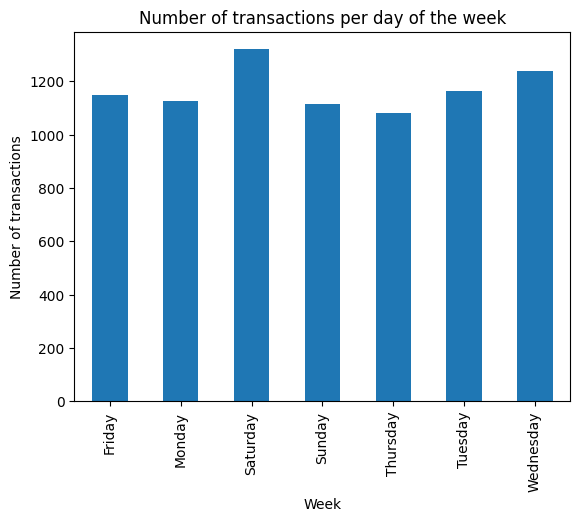

In [94]:
transactions_by_day = df['day_of_week'].value_counts().sort_index()
print("Number of transactions per day of the week:")
print(transactions_by_day)
transactions_by_day.plot(kind='bar', title='Number of transactions per day of the week')
plt.xlabel('Week')
plt.ylabel('Number of transactions')
plt.show()

In [95]:
busiest_day = transactions_by_day.idxmax()
max_transactions_day = transactions_by_day.max()

print(f"The highest number of transactions, {max_transactions_day}, was made on {busiest_day}.")


The highest number of transactions, 1320, was made on Saturday.


# Analysis based on time of day

Number of transactions per hour of the day:
hour
0     362
1     323
2     355
3     349
4     360
5     348
6     383
7     338
8     307
9     393
10    299
11    340
12    349
13    357
14    300
15    258
16    311
17    391
18    328
19    338
20    320
21    378
22    348
23    357
Name: count, dtype: int64


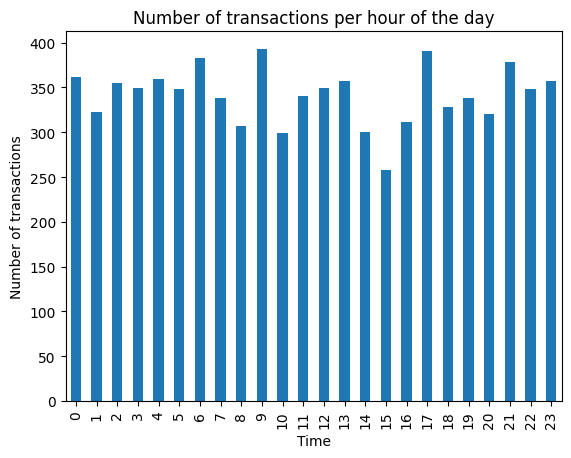

In [96]:
transactions_by_hour = df['hour'].value_counts().sort_index()
print('Number of transactions per hour of the day:')
print(transactions_by_hour)
transactions_by_hour.plot(kind='bar', title='Number of transactions per hour of the day')
plt.xlabel('Time')
plt.ylabel('Number of transactions')
plt.show()

In [97]:
busiest_hour = transactions_by_hour.idxmax()
max_transactions_hour = transactions_by_hour.max()

print(f"The highest number of transactions, {max_transactions_hour}, was made at {busiest_hour}.")


The highest number of transactions, 393, was made at 9.


<b> Q1. Is there a specific pattern when customers buy?</b><br>
yes, <br>
most transactions are done on Saturday. <br>
most transactions are done at 9am.

# <b> Step 2

# Pre-processing

In [98]:
df = df.dropna(subset=['store', 'total_price'])

# Calculating total sales and sorting stores

In [99]:
total_items_by_store = df.groupby('store')['total_price'].sum()
total_items_by_store = total_items_by_store.sort_values(ascending=False)

# Show top 10 stores with the highest sales

In [100]:
print("Top ten stores with the most items sold:")
print(total_items_by_store.head(10))

Top ten stores with the most items sold:
store
Jewelry Store           1.226038e+10
Home Appliance Store    4.831257e+09
Electronics Store       3.855097e+09
Clothing Store          1.476769e+09
Furniture Store         1.389610e+09
Hardware Store          9.986125e+08
Chain Store             8.477238e+08
Sporting Goods Store    5.665938e+08
Supermarket             3.942086e+08
Toy Store               3.754816e+08
Name: total_price, dtype: float64


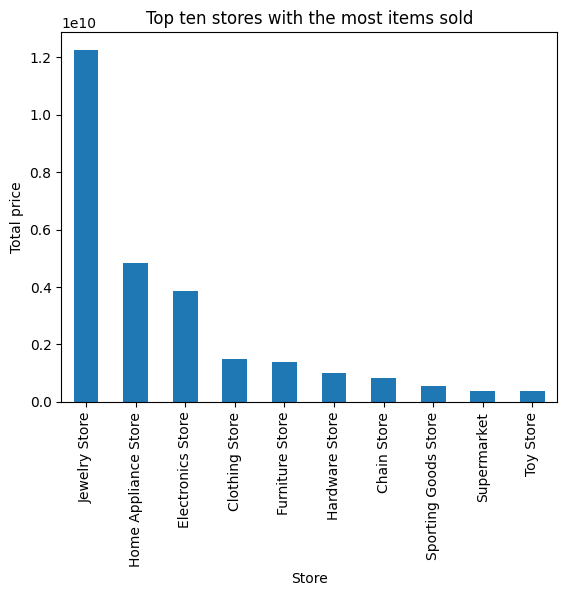

In [101]:
total_items_by_store.head(10).plot(kind='bar', title='Top ten stores with the most items sold')
plt.xlabel('Store')
plt.ylabel('Total price')
plt.show()

<b> Q2. Which stores have the most sales?</b><br>
Shown in order. The Jewelry Store also has the highest sales. <br>


# <b> Step 3

# Pre-processing

In [102]:
df = df.dropna(subset=['product_name', 'quantity'])

# Calculating total sales and sorting products

In [103]:
total_quantity_by_product = df.groupby('product_name')['quantity'].sum()
total_quantity_by_product = total_quantity_by_product.sort_values(ascending=False)

# Show top 10 products with the highest sales

In [104]:
print("Top 10 products with the highest sales:")
print(total_quantity_by_product.head(10))

Top 10 products with the highest sales:
product_name
Supermarket Product 16     140
Supermarket Product 35     132
Supermarket Product 97     118
Supermarket Product 137    117
Supermarket Product 154    110
Supermarket Product 44     101
Supermarket Product 155    101
Supermarket Product 73     101
Supermarket Product 30      98
Supermarket Product 99      92
Name: quantity, dtype: int64


Text(0, 0.5, 'Number of sales')

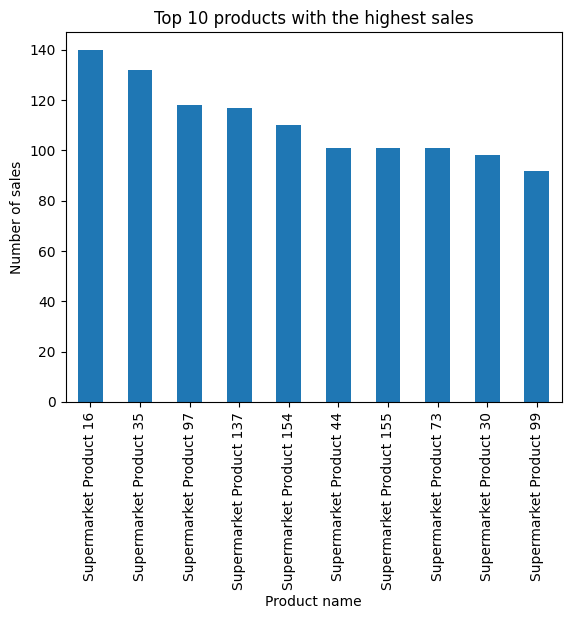

In [105]:
total_quantity_by_product.head(10).plot(kind='bar', title='Top 10 products with the highest sales')
plt.xlabel('Product name')
plt.ylabel('Number of sales')

<b> Q3. What are the best-selling products?</b><br>
Shown in order. Supermarket Product 16 is also the best-selling product. <br>